# Comparing variable and fixed interest rates

Comparing variable and fixed interest rate mortgages is hard.  While there are some obvious points of comparison (typically lower rates for variable at any given point, and higher rates for fixed; early termination fees are smaller for variable than fixed, etc.) it's difficult to get any accurate comparisons of where your money is going and what is a better investment.

The metric I care about is for a fixed monthly payment, how much is going into principal and how much is going into interest? This is suprisingly difficult to answer online-- I didn't find any good calculators for this, because no one want to provide a tool for specifying future interest rates. Things get even more complicated to make comparisons with, because fixed and variable rate mortgages compound interest differently (semi-annually vs monthly). So what we should do is make a comparison list of several possible interest rate trajectories, and see what the outcomes are.

A few observations about what we want to learn: 

* Variable rates tend to be lower, and therefore start with a lower monthly payment. We're going to raise our montly payment here with extra pyaments towards principal to equalize the payments. 
* When interest rates go up for variable rate loans, the monthly payment stays the same, and less money goes towards principal. This is where the interesting comparison lies: we'll typically be paying the same amount no matter what, but want to see how much of this is going towards our equity (principal) vs the bank.
* At least one of our lending options for the variable requires a 30 year term, which again lowers the monthly payment. We'll make up for the difference using extra payments towards principal, and see how this ends up comparing.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# basic imports
import calc_tools as ct
import numpy as np

## Some basic comparisons

We are going for a 985000 condo, with a 350000 downpayment, leading to a 635000 mortgage. Our best fixed rate offer is a 25 year, 3.09% rate. The basic payments are going to be:

In [3]:
monthly_fixed = ct.calculate_payment(635000, 3.09, 25)
print(monthly_fixed)

3034.51


The calculations are all done via the calc_tools.py python module that lives in the same area as this notebook.

Let's compare the payment to the variable offer we have, hypothetically for a 25 year:

In [4]:
monthly_variable = ct.calculate_payment(635000, 1.74, 25, variable = True)
print(monthly_variable)

2611.82


Extra payments per month should be the difference here:

In [5]:
extra_25 = ct.generate_flat(monthly_fixed - monthly_variable)
print(extra_25[0])

422.69000000000005


Let's calculate a few scenarios out now:

1) Fixed rate 
2) Variable rate, no extra payments
3) Variable rate, with extra payments

For both variable rate scenarios right now, we're going to assume no rate increases. Super optimistic, but let's see what happens in order to build some intuition.

In [6]:
variable_base = ct.generate_flat(1.74)
fixed = ct.generate_flat(3.09)

The function that does the magic here is ```calculate_montly_amortization(loan, rates, loan_length_years, term_length_years, extra_payments = [], variable = False)```. 

In [7]:
output_fixed = ct.calculate_monthly_amortization(635000, fixed, 25, 5, variable = False)
output_variable_base = ct.calculate_monthly_amortization(635000, variable_base, 25, 5, variable = True)
output_variable_base_extra = ct.calculate_monthly_amortization(635000, variable_base, 25, 5, extra_payments = extra_25, variable = True)

Magic! The hard part is done. Let's do some comparisons now.

In [8]:
basic_comparison = [output_fixed, output_variable_base, output_variable_base_extra]
basic_labels = ['Fixed 3.09', 'Variable 1.74', 'Variable 1.74 w/ extra']

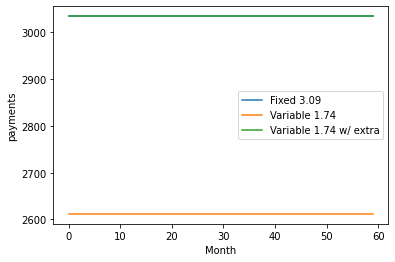

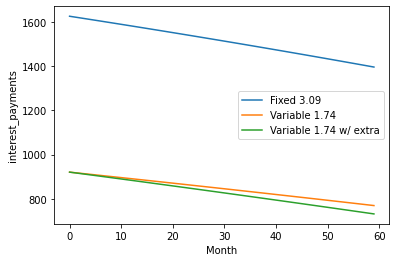

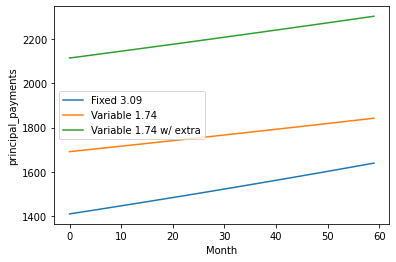

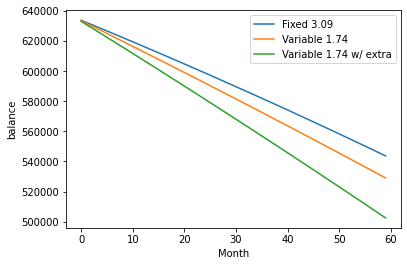

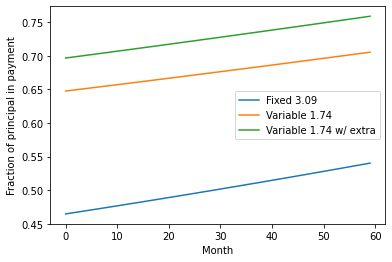

In [9]:
ct.make_plots_vs_time(basic_comparison, basic_labels)

A few observations:

* Payments are fixed, as they should be. And the VR + extra matches the fixed.
* The fraction of the payment that is interest shrinks over time, and the fraction that is interest grows, as expected.
* There is quite a difference in terms of the balances at the end! As expected with a much lower interest rate.
* Finally, you can also see the fraction of principal being paid in the payment; with the higher interest rate, much, much smaller fractions are being paid toward the principal.

Let's summarize some of the takehome points:

For Fixed 3.09, your final balance is 543698.97. You paid 90769.57 in interest and 91301.03 in principal, for a principal fraction of 0.501

For Variable 1.74, your final balance is 529071.41. You paid 50780.61 in interest and 105928.59 in principal, for a principal fraction of 0.676

For Variable 1.74 w/ extra, your final balance is 502594.14. You paid 49664.74 in interest and 132405.86 in principal, for a principal fraction of 0.727

Out of the above choices, Variable 1.74 w/ extra has the best final balance, at 502594.14000000013. This gives 41104.83 of savings compared to the worst scenario, Fixed 3.09.


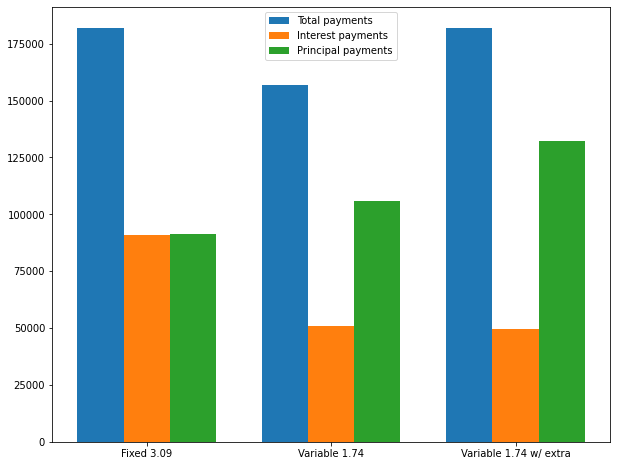

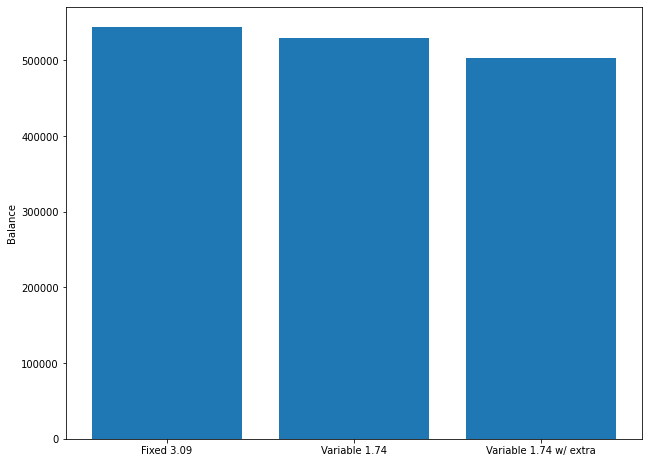

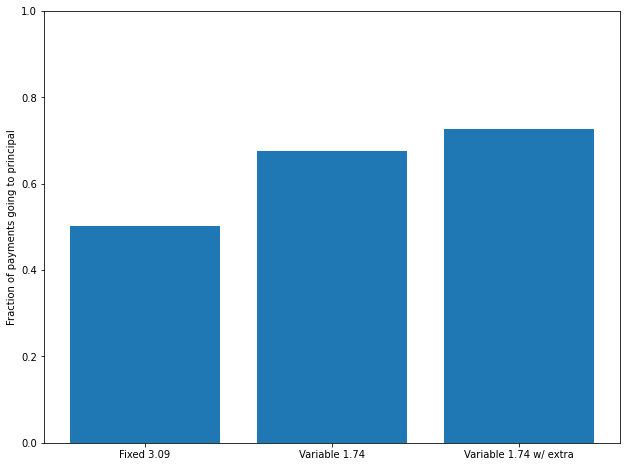

In [10]:
ct.make_summary(basic_comparison, basic_labels)

Ok-- we've learned a lot! The best scenario here-- the artifically optimistic VR with 1.79 rate compared to the fixed 3.09 saves us 40k over the 5 year mortgage. Nothing to sneeze at! Another good lesson is how much adding extra principal helps-- we're obviously putting more money in as the payments are higher, but we save more than 1k in interest. It's important to keep in mind that the main difference in the final balance is coming just from our extra payments, however.

Let's try some more realistic comparisons now.

### Addendum: 30 year mortgage

One funny complication of our situtation is that one of our VR quotes is for a 30 year mortgage. Does this make a difference? Let's find out.

2611.82
769.12


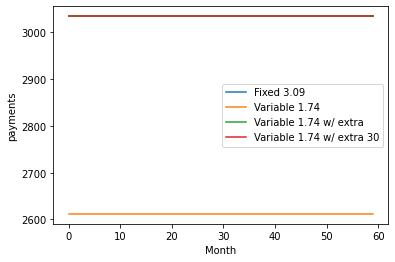

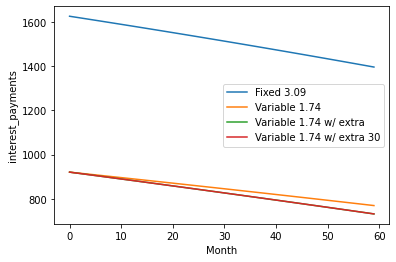

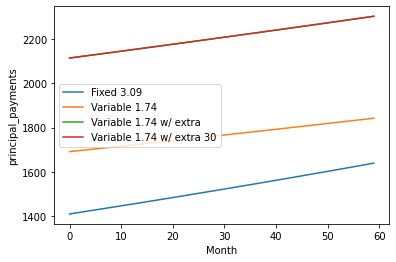

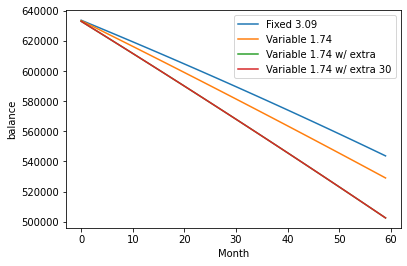

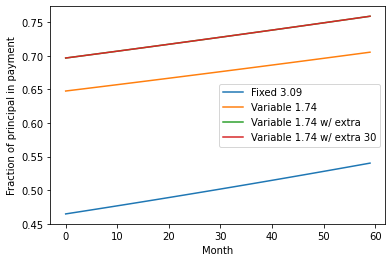

For Fixed 3.09, your final balance is 543698.97. You paid 90769.57 in interest and 91301.03 in principal, for a principal fraction of 0.501

For Variable 1.74, your final balance is 529071.41. You paid 50780.61 in interest and 105928.59 in principal, for a principal fraction of 0.676

For Variable 1.74 w/ extra, your final balance is 502594.14. You paid 49664.74 in interest and 132405.86 in principal, for a principal fraction of 0.727

For Variable 1.74 w/ extra 30, your final balance is 502594.14. You paid 49664.74 in interest and 132405.86 in principal, for a principal fraction of 0.727

Out of the above choices, Variable 1.74 w/ extra has the best final balance, at 502594.14000000013. This gives 41104.83 of savings compared to the worst scenario, Fixed 3.09.


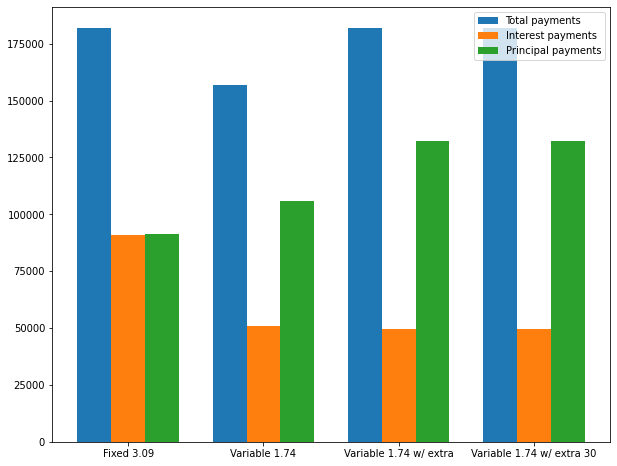

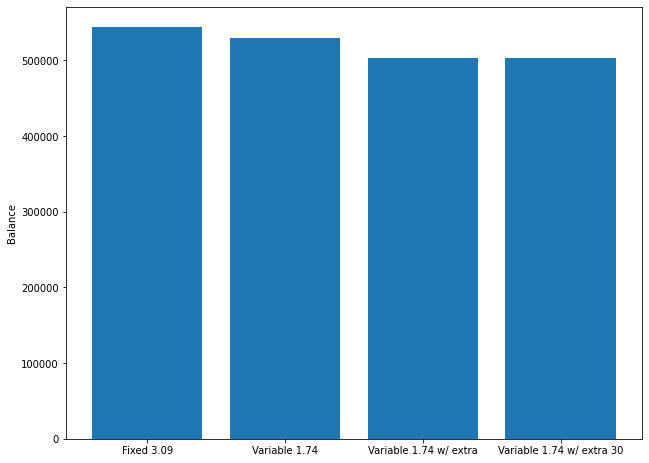

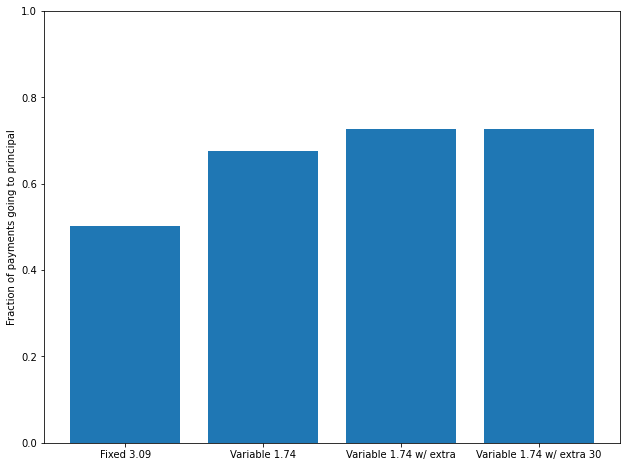

In [11]:
monthly_variable_30 = ct.calculate_payment(635000, 1.74, 30, variable = True)
print(monthly_variable)

extra_30 = ct.generate_flat(round(monthly_fixed - monthly_variable_30,2))
print(extra_30[0])

output_variable_base_extra_30 = ct.calculate_monthly_amortization(635000, variable_base, 30, 5, extra_payments = extra_30, variable = True)

basic_comparison = [output_fixed, output_variable_base, output_variable_base_extra, output_variable_base_extra_30]
basic_labels = ['Fixed 3.09', 'Variable 1.74', 'Variable 1.74 w/ extra', 'Variable 1.74 w/ extra 30']

ct.make_plots_vs_time(basic_comparison, basic_labels)
ct.make_summary(basic_comparison, basic_labels)

Ok, here the green and red and literally on top of each other. We know they're entirely the same, so we can just use 25 comparisons from here on out.

Note that there's actually one subtlety here: there's a maximum you can pay off on VR loans "extra" per year without triggering penalties. Apparently that number is typically 20%-- we're not going to run into trouble here.

## More complicated scenarios

Ok, so from the above it looks like you're getting 40k for free from the variable rate approach. But we know that's not true-- the big complication is that rates might go up! And we don't know how much! So let's construct a few interest rate scenarios, and compare them to the baseline.

The first important piece of input here is that we know the US Fed has announced 6 interest rate hikes over the next year-- every two months. Canada will probably do something similar, as interest rates always seem to be pretty correlated between the two countries. We can construct a few possible scenarios from this:

1) Variable 1.74 medium: we get the scheduled rate hikes, and they hold for all five years.
2) Variable 1.74 very optimistic: we get the schedule rate hikes, hold for a year, then lower again.
3) Variable 1.74 optimistic: we get the schedule rate hikes, they hold for two years, then lower again.
4) Variable 1.74 very pessimistic: we get the scheduled rate hikes, keep going at the same rate for a year, and hold
5) Variable 1.74 pessimistic: we get the scheduled rates hikes, keep going at the same rate for a year, hold for a year, start reducing at same rate

So let's construct these options. We already have a 1.74 variable base, so we just have to create modifications to that and sum them in.

In [12]:
# forgive the ugliness. suggestions welcome to fix this.

variable_med = variable_base + np.concatenate([ct.generate_flat(0., 2), ct.generate_flat(0.25, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.75, 2), ct.generate_flat(1.0, 2), ct.generate_flat(1.25,2), ct.generate_flat(1.5,2), ct.generate_flat(1.5, 46)])

variable_ver_opt = variable_base + np.concatenate([ct.generate_flat(0., 2), ct.generate_flat(0.25, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.75, 2), ct.generate_flat(1.0, 2), ct.generate_flat(1.25,2), ct.generate_flat(1.5,2), ct.generate_flat(1.5, 12), ct.generate_flat(1.25, 2), ct.generate_flat(1.0, 2), ct.generate_flat(0.75, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.25, 2), ct.generate_flat(0, 24)])

variable_opt = variable_base + np.concatenate([ct.generate_flat(0., 2), ct.generate_flat(0.25, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.75, 2), ct.generate_flat(1.0, 2), ct.generate_flat(1.25,2), ct.generate_flat(1.5,2), ct.generate_flat(1.5, 24), ct.generate_flat(1.25, 2), ct.generate_flat(1.0, 2), ct.generate_flat(0.75, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.25, 2), ct.generate_flat(0, 12)])

variable_ver_pes = variable_base + np.concatenate([ct.generate_flat(0., 2), ct.generate_flat(0.25, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.75, 2), ct.generate_flat(1.0, 2), ct.generate_flat(1.25,2), ct.generate_flat(1.5,2), ct.generate_flat(1.75, 2), ct.generate_flat(2.0, 2), ct.generate_flat(2.25, 2), ct.generate_flat(2.5,2), ct.generate_flat(2.75, 2), ct.generate_flat(3.0, 2),ct.generate_flat(3.0, 34)]) 

variable_pes = variable_base + np.concatenate([ct.generate_flat(0., 2), ct.generate_flat(0.25, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.75, 2), ct.generate_flat(1.0, 2), ct.generate_flat(1.25,2), ct.generate_flat(1.5,2), ct.generate_flat(1.75, 2), ct.generate_flat(2.0, 2), ct.generate_flat(2.25, 2), ct.generate_flat(2.5,2), ct.generate_flat(2.75, 2), ct.generate_flat(3.0, 2),ct.generate_flat(3.0, 10), ct.generate_flat(2.75, 2), ct.generate_flat(2.5,2), ct.generate_flat(2.25,2), ct.generate_flat(2.0, 2), ct.generate_flat(1.75, 2), ct.generate_flat(1.5, 2), ct.generate_flat(1.25, 2), ct.generate_flat(1.0, 2), ct.generate_flat(0.75, 2), ct.generate_flat(0.5, 2), ct.generate_flat(0.25,2), ct.generate_flat(0.0, 2)]) 

print(len(variable_med))
print(len(variable_ver_opt))
print(len(variable_opt))
print(len(variable_ver_pes))
print(len(variable_pes))


60
60
60
60
60


Let's plot these to make sure they look sensible

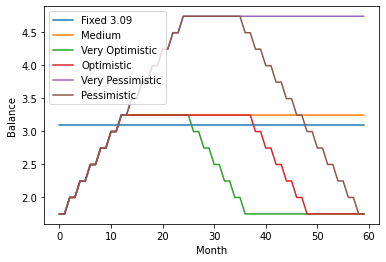

In [13]:
ct.plot_vs_time([fixed, variable_med, variable_ver_opt, variable_opt, variable_ver_pes, variable_pes], ['Fixed 3.09', 'Medium', 'Very Optimistic', 'Optimistic', 'Very Pessimistic', 'Pessimistic'])

Ok, all set. So let's do some comparisons calculations. We're going to just go with the same extra payment schedule as before, to make the easiest comparisons-- this will have the same financial impact on us as the fixed rate (per month) so it makes the most sense to compare.

In [14]:
output_variable_med = ct.calculate_monthly_amortization(635000, variable_med, 25, 5, extra_payments = extra_25, variable = True)
output_variable_ver_opt = ct.calculate_monthly_amortization(635000, variable_ver_opt, 25, 5, extra_payments = extra_25, variable = True)
output_variable_opt = ct.calculate_monthly_amortization(635000, variable_opt, 25, 5, extra_payments = extra_25, variable = True)
output_variable_ver_pes = ct.calculate_monthly_amortization(635000, variable_ver_pes, 25, 5, extra_payments = extra_25, variable = True)
output_variable_pes = ct.calculate_monthly_amortization(635000, variable_pes, 25, 5, extra_payments = extra_25, variable = True)


In [15]:
advanced_comparison = [output_fixed, output_variable_med, output_variable_ver_opt, output_variable_opt, output_variable_ver_pes, output_variable_pes]
advanced_labels = ['Fixed 3.09', 'Medium', 'Very Optimistic', 'Optimistic', 'Very Pessimistic', 'Pessimistic']

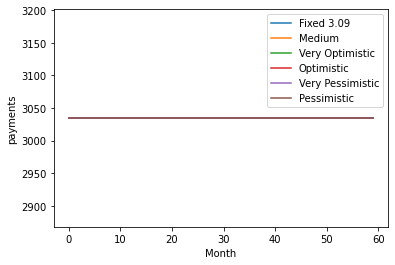

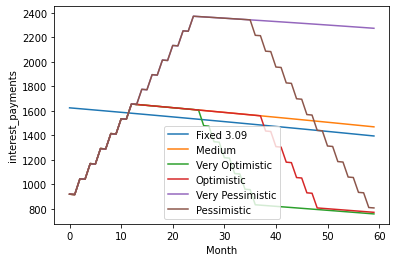

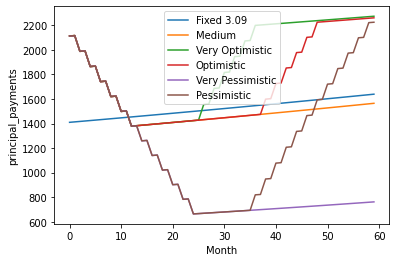

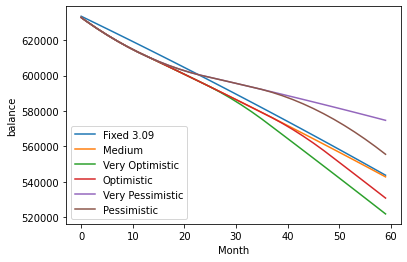

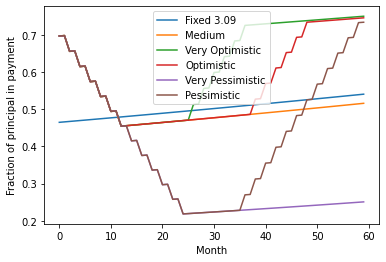

For Fixed 3.09, your final balance is 543698.97. You paid 90769.57 in interest and 91301.03 in principal, for a principal fraction of 0.501

For Medium, your final balance is 542777.74. You paid 89848.34 in interest and 92222.26 in principal, for a principal fraction of 0.507

For Very Optimistic, your final balance is 521822.7. You paid 68893.3 in interest and 113177.3 in principal, for a principal fraction of 0.622

For Optimistic, your final balance is 530787.57. You paid 77858.17 in interest and 104212.43 in principal, for a principal fraction of 0.572

For Very Pessimistic, your final balance is 574742.6. You paid 121813.2 in interest and 60257.4 in principal, for a principal fraction of 0.331

For Pessimistic, your final balance is 555550.11. You paid 102620.71 in interest and 79449.89 in principal, for a principal fraction of 0.436

Out of the above choices, Very Optimistic has the best final balance, at 521822.7000000001. This gives 52919.9 of savings compared to the worst scen

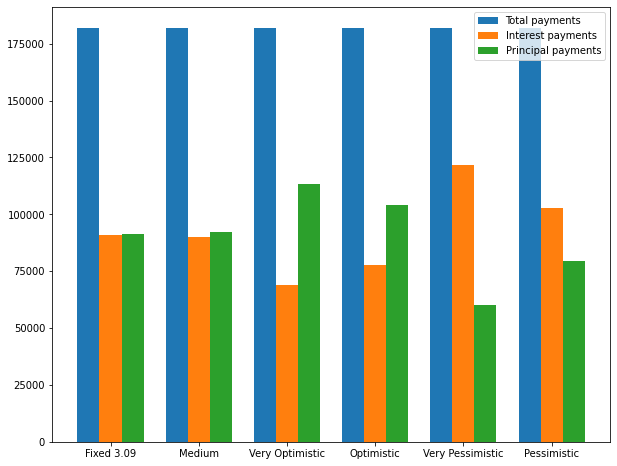

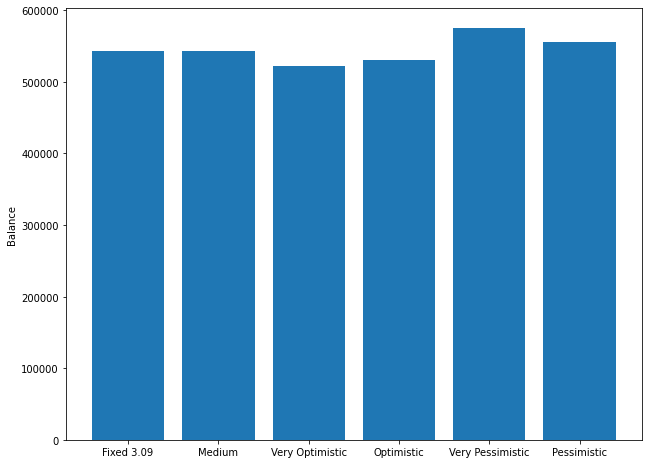

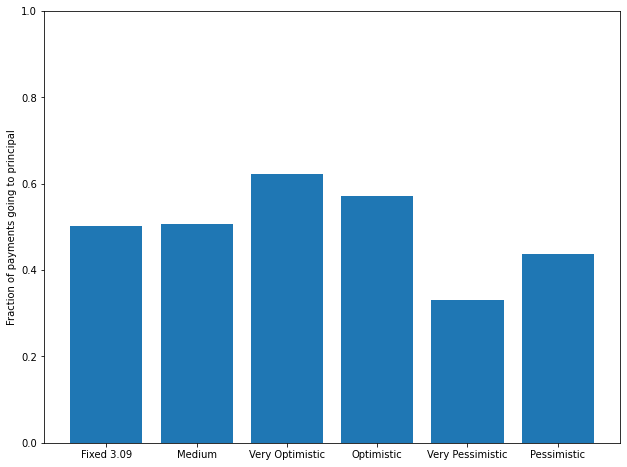

In [16]:
ct.make_plots_vs_time(advanced_comparison, advanced_labels)
ct.make_summary(advanced_comparison, advanced_labels)

The conclusions are probably not too surprising. The medium option balances out with fixed rate almost completely; the two optimistic options end up netting 12k and 21k in principal, while the pessimistic options end up losing 30k and 12k in principal (out of a baseline of 91k). It's not surprising that the range of outcomes straddles the fixed rate in the middle, as we constructed the ratio scenarios around the 3.09 intentionally.

So what can we conclude? Either way, things will be fine. We are talking about swings of 10k in either direction, likely. That's not the end of the world to make or lose in a bet. But it certaintly makes this choice feel a lot more like gambling than I like!

### What about no extra payments?

We saw previously that adding extra payments saved us about 1k in interest in the baseline, unrealistically optimistic scenario. What about some of these more advanced models?

In [17]:
output_variable_med_noextra = ct.calculate_monthly_amortization(635000, variable_med, 25, 5, variable = True)
output_variable_ver_opt_noextra = ct.calculate_monthly_amortization(635000, variable_ver_opt, 25, 5, variable = True)
output_variable_ver_pes_noextra = ct.calculate_monthly_amortization(635000, variable_ver_pes, 25, 5, variable = True)

In [18]:
advanced_comparison_noextra = [output_fixed, output_variable_med_noextra, output_variable_ver_opt_noextra, output_variable_ver_pes_noextra]
advanced_labels_noextra = ['Fixed 3.09', 'Medium NoE', 'Very Optimistic NoE', 'Very Pessimistic NoE']

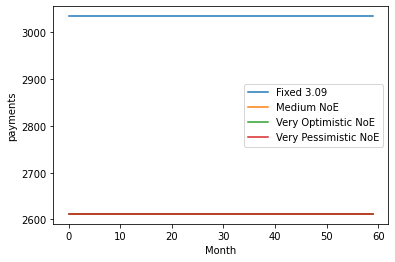

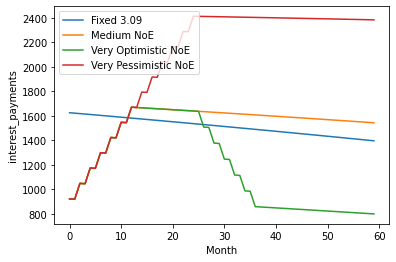

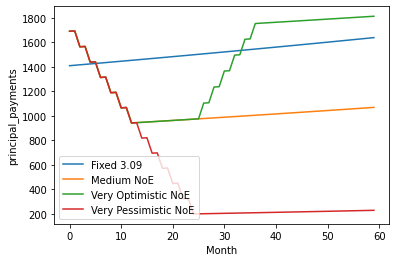

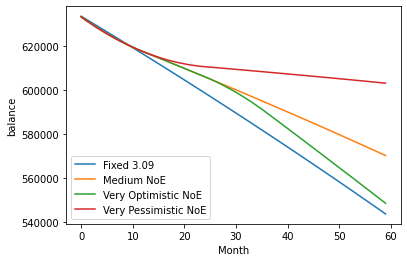

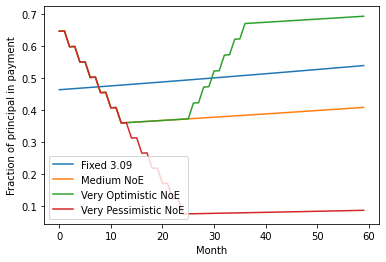

For Fixed 3.09, your final balance is 543698.97. You paid 90769.57 in interest and 91301.03 in principal, for a principal fraction of 0.501

For Medium NoE, your final balance is 570252.35. You paid 91961.55 in interest and 64747.65 in principal, for a principal fraction of 0.413

For Very Optimistic NoE, your final balance is 548554.07. You paid 70263.27 in interest and 86445.93 in principal, for a principal fraction of 0.552

For Very Pessimistic NoE, your final balance is 603167.04. You paid 124876.24 in interest and 31832.96 in principal, for a principal fraction of 0.203

Out of the above choices, Fixed 3.09 has the best final balance, at 543698.9699999994. This gives 59468.07 of savings compared to the worst scenario, Very Pessimistic NoE.


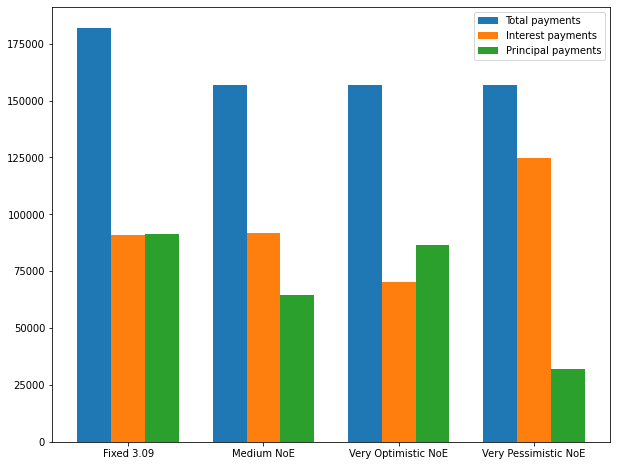

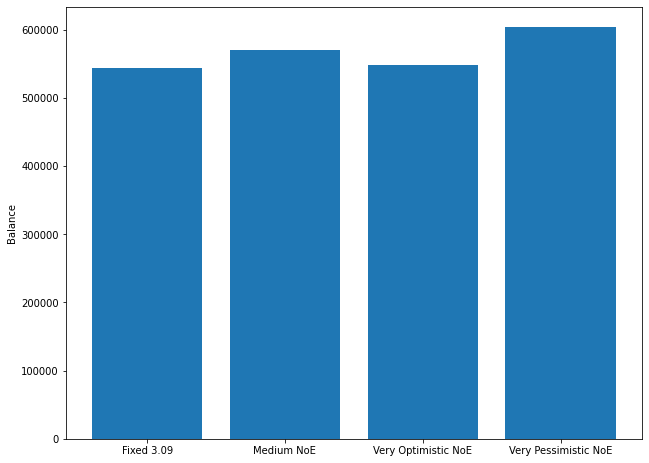

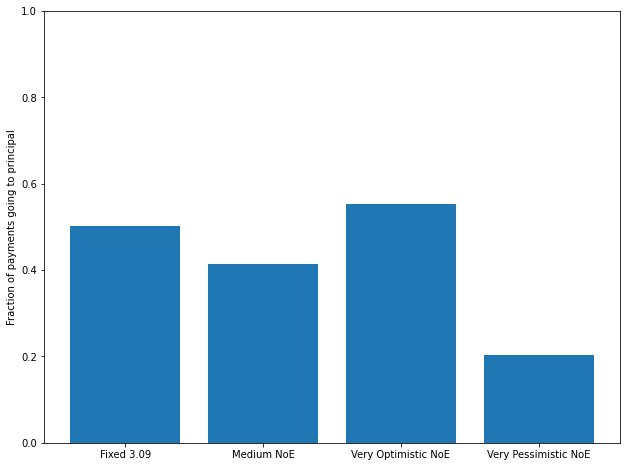

In [19]:
ct.make_plots_vs_time(advanced_comparison_noextra, advanced_labels_noextra)
ct.make_summary(advanced_comparison_noextra, advanced_labels_noextra)

The conclusion here is in the subtle comparison of interest paid in the very pessimistic scenario: 121813.2 with extra payments, and 124876.24 without, for a difference of 3000. For medium, the difference is 2000, and 1000 for very optimistic. So the conclusion is that the extra payments do make more of an impact in a pessimistic environment, but to the scale of a few thousand dollars.